# Processing Data

This example is motivated by the Bike Sharing Dataset that can be found among the UCI ML and Kaggle datasets.
* https://www.kaggle.com/lakshmi25npathi/bike-sharing-dataset
* https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset

Both of these have already been pre-processed.  

I've created a new starting state with mock "original" values to illustrate some pre-processing steps one might go through.
* https://github.com/benjum/UCLA-24W-DH150/blob/main/Data/bike_sharing_processed.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
bike_sharing_df = pd.read_csv('https://raw.githubusercontent.com/benjum/UCLA-24W-DH150/main/Data/bike_sharing_processed.csv')

In [3]:
bike_sharing_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,winter,2011,January,no,Saturday,no,Mist + Broken clouds,8.692971,8.652147,80.5833,10.749882,331,654,985
1,2,2011-01-02,winter,2011,January,no,Sunday,no,Mist + Broken clouds,9.823906,7.795684,69.6087,16.652113,131,670,801
2,3,2011-01-03,winter,2011,January,no,Monday,yes,Few clouds,0.036991,-6.441213,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,winter,2011,January,no,Tuesday,yes,Clear,0.249931,-4.473150,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,winter,2011,January,no,Wednesday,yes,Partly cloudy,1.828649,-2.987552,43.6957,12.522300,82,1518,1600


In [4]:
bike_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    object 
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    object 
 5   holiday     731 non-null    object 
 6   weekday     731 non-null    object 
 7   workingday  731 non-null    object 
 8   weathersit  731 non-null    object 
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(5), object(7)
memory usage: 91.5+ KB


In [5]:
# descriptive stats:
bike_sharing_df.describe()

,instant,yr,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2011.500684,17.548936,18.245032,62.789406,12.762576,848.176471,3656.172367,4504.348837
std,211.165812,0.500342,10.720255,14.117964,14.242910,5.192357,686.622488,1560.256377,1937.211452
min,1.000000,2011.000000,-8.000000,-16.000000,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.500000,2011.000000,8.278131,6.418508,52.000000,9.041650,315.500000,2497.000000,3152.000000
50%,366.000000,2012.000000,17.721596,19.317474,62.666700,12.125325,713.000000,3662.000000,4548.000000
75%,548.500000,2012.000000,26.921082,29.875462,73.020850,15.625371,1096.000000,4776.500000,5956.000000
max,731.000000,2012.000000,39.000000,50.000000,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# MORE descriptive stats:
bike_sharing_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731.000000,731,731,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,4,NaN,12,2,7,2,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,summer,NaN,January,no,Saturday,yes,Partly cloudy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,188,NaN,62,710,105,500,232,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,NaN,2011.500684,NaN,NaN,NaN,NaN,NaN,17.548936,18.245032,62.789406,12.762576,848.176471,3656.172367,4504.348837
std,211.165812,NaN,NaN,0.500342,NaN,NaN,NaN,NaN,NaN,10.720255,14.117964,14.242910,5.192357,686.622488,1560.256377,1937.211452
min,1.000000,NaN,NaN,2011.000000,NaN,NaN,NaN,NaN,NaN,-8.000000,-16.000000,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.500000,NaN,NaN,2011.000000,NaN,NaN,NaN,NaN,NaN,8.278131,6.418508,52.000000,9.041650,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,17.721596,19.317474,62.666700,12.125325,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,26.921082,29.875462,73.020850,15.625371,1096.000000,4776.500000,5956.000000


We're going to apply some data transformations, motivated by the data specifications on https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset:
* drop the 'instant' column
* change 'season' to (1:winter, 2:spring, 3:summer, 4:fall)
* change 'year' to (0:2011, 1:2012)
* change 'mnth' to be 0 - 12
* change 'holiday' to be (0:no, 1:yes)
* change 'weekday' to be 0 - 6
* change 'workingday' to be (0:no, 1:yes)
* change 'weathersit':
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
* normalize 'temp' (current min/max are -8/+39)
* normalize 'atemp' (current min/max are -16/+50)
* normalize 'hum' (max is 100)
* normalize 'windspeed' (max is 67)

In [7]:
# the current state:
bike_sharing_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,winter,2011,January,no,Saturday,no,Mist + Broken clouds,8.692971,8.652147,80.5833,10.749882,331,654,985
1,2,2011-01-02,winter,2011,January,no,Sunday,no,Mist + Broken clouds,9.823906,7.795684,69.6087,16.652113,131,670,801
2,3,2011-01-03,winter,2011,January,no,Monday,yes,Few clouds,0.036991,-6.441213,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,winter,2011,January,no,Tuesday,yes,Clear,0.249931,-4.473150,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,winter,2011,January,no,Wednesday,yes,Partly cloudy,1.828649,-2.987552,43.6957,12.522300,82,1518,1600


## Drop columns

In [8]:
bike_sharing_df = bike_sharing_df.drop('instant', axis=1)

# Review the difference
bike_sharing_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,winter,2011,January,no,Saturday,no,Mist + Broken clouds,8.692971,8.652147,80.5833,10.749882,331,654,985
1,2011-01-02,winter,2011,January,no,Sunday,no,Mist + Broken clouds,9.823906,7.795684,69.6087,16.652113,131,670,801
2,2011-01-03,winter,2011,January,no,Monday,yes,Few clouds,0.036991,-6.441213,43.7273,16.636703,120,1229,1349
3,2011-01-04,winter,2011,January,no,Tuesday,yes,Clear,0.249931,-4.473150,59.0435,10.739832,108,1454,1562
4,2011-01-05,winter,2011,January,no,Wednesday,yes,Partly cloudy,1.828649,-2.987552,43.6957,12.522300,82,1518,1600


## Mapping values

In [9]:
season_mapping = {'winter': 1, 'spring': 2, 'summer': 3, 'fall': 4}
bike_sharing_df['season'] = bike_sharing_df['season'].map(season_mapping)

# Review the difference
bike_sharing_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,2011,January,no,Saturday,no,Mist + Broken clouds,8.692971,8.652147,80.5833,10.749882,331,654,985
1,2011-01-02,1,2011,January,no,Sunday,no,Mist + Broken clouds,9.823906,7.795684,69.6087,16.652113,131,670,801
2,2011-01-03,1,2011,January,no,Monday,yes,Few clouds,0.036991,-6.441213,43.7273,16.636703,120,1229,1349
3,2011-01-04,1,2011,January,no,Tuesday,yes,Clear,0.249931,-4.473150,59.0435,10.739832,108,1454,1562
4,2011-01-05,1,2011,January,no,Wednesday,yes,Partly cloudy,1.828649,-2.987552,43.6957,12.522300,82,1518,1600


In [10]:
# Notice the change from object to int
# Some care must be exercised when dealing with numerical vs categorical data

bike_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      731 non-null    object 
 1   season      731 non-null    int64  
 2   yr          731 non-null    int64  
 3   mnth        731 non-null    object 
 4   holiday     731 non-null    object 
 5   weekday     731 non-null    object 
 6   workingday  731 non-null    object 
 7   weathersit  731 non-null    object 
 8   temp        731 non-null    float64
 9   atemp       731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  casual      731 non-null    int64  
 13  registered  731 non-null    int64  
 14  cnt         731 non-null    int64  
dtypes: float64(4), int64(5), object(6)
memory usage: 85.8+ KB


In [11]:
# Since season is numerical, the summary stats for numerical data are applicable
bike_sharing_df.describe()

,season,yr,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,2011.500684,17.548936,18.245032,62.789406,12.762576,848.176471,3656.172367,4504.348837
std,1.110807,0.500342,10.720255,14.117964,14.242910,5.192357,686.622488,1560.256377,1937.211452
min,1.000000,2011.000000,-8.000000,-16.000000,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,2011.000000,8.278131,6.418508,52.000000,9.041650,315.500000,2497.000000,3152.000000
50%,3.000000,2012.000000,17.721596,19.317474,62.666700,12.125325,713.000000,3662.000000,4548.000000
75%,3.000000,2012.000000,26.921082,29.875462,73.020850,15.625371,1096.000000,4776.500000,5956.000000
max,4.000000,2012.000000,39.000000,50.000000,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [12]:
# An object/categorical version of season transformation

# If we try this again, we'll either need to reverse our operation
# or just go through everything from the start again
bike_sharing_df = pd.read_csv('https://raw.githubusercontent.com/benjum/UCLA-24W-DH150/main/Data/bike_sharing_processed.csv')
bike_sharing_df = bike_sharing_df.drop('instant', axis=1)

# Mapping for 'season'
season_mapping = {'winter': '1', 'spring': '2', 'summer': '3', 'fall': '4'}
bike_sharing_df['season'] = bike_sharing_df['season'].map(season_mapping)

# Review the difference
bike_sharing_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,2011,January,no,Saturday,no,Mist + Broken clouds,8.692971,8.652147,80.5833,10.749882,331,654,985
1,2011-01-02,1,2011,January,no,Sunday,no,Mist + Broken clouds,9.823906,7.795684,69.6087,16.652113,131,670,801
2,2011-01-03,1,2011,January,no,Monday,yes,Few clouds,0.036991,-6.441213,43.7273,16.636703,120,1229,1349
3,2011-01-04,1,2011,January,no,Tuesday,yes,Clear,0.249931,-4.473150,59.0435,10.739832,108,1454,1562
4,2011-01-05,1,2011,January,no,Wednesday,yes,Partly cloudy,1.828649,-2.987552,43.6957,12.522300,82,1518,1600


In [13]:
# Season stays an object data-type (for string)

bike_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      731 non-null    object 
 1   season      731 non-null    object 
 2   yr          731 non-null    int64  
 3   mnth        731 non-null    object 
 4   holiday     731 non-null    object 
 5   weekday     731 non-null    object 
 6   workingday  731 non-null    object 
 7   weathersit  731 non-null    object 
 8   temp        731 non-null    float64
 9   atemp       731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  casual      731 non-null    int64  
 13  registered  731 non-null    int64  
 14  cnt         731 non-null    int64  
dtypes: float64(4), int64(4), object(7)
memory usage: 85.8+ KB


In [14]:
# Since season is categorical again, numerical summary stats are _not_ applicable
bike_sharing_df.describe()

,yr,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2011.500684,17.548936,18.245032,62.789406,12.762576,848.176471,3656.172367,4504.348837
std,0.500342,10.720255,14.117964,14.242910,5.192357,686.622488,1560.256377,1937.211452
min,2011.000000,-8.000000,-16.000000,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2011.000000,8.278131,6.418508,52.000000,9.041650,315.500000,2497.000000,3152.000000
50%,2012.000000,17.721596,19.317474,62.666700,12.125325,713.000000,3662.000000,4548.000000
75%,2012.000000,26.921082,29.875462,73.020850,15.625371,1096.000000,4776.500000,5956.000000
max,2012.000000,39.000000,50.000000,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [15]:
bike_sharing_df['season'].value_counts()

# The following will order by season value rather than the count
# bike_sharing_df['season'].value_counts(sort=False)

3    188
2    184
1    181
4    178
Name: season, dtype: int64

In [16]:
# Mapping for 'year'
year_mapping = {2011: 0, 2012: 1}
bike_sharing_df['yr'] = bike_sharing_df['yr'].map(year_mapping)

# Review the difference
bike_sharing_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,January,no,Saturday,no,Mist + Broken clouds,8.692971,8.652147,80.5833,10.749882,331,654,985
1,2011-01-02,1,0,January,no,Sunday,no,Mist + Broken clouds,9.823906,7.795684,69.6087,16.652113,131,670,801
2,2011-01-03,1,0,January,no,Monday,yes,Few clouds,0.036991,-6.441213,43.7273,16.636703,120,1229,1349
3,2011-01-04,1,0,January,no,Tuesday,yes,Clear,0.249931,-4.473150,59.0435,10.739832,108,1454,1562
4,2011-01-05,1,0,January,no,Wednesday,yes,Partly cloudy,1.828649,-2.987552,43.6957,12.522300,82,1518,1600


In [17]:
# Mapping for 'mnth'
month_mapping = {'January': 1, 'February': 2, 'March': 3, 
                 'April': 4, 'May': 5, 'June': 6, 
                 'July': 7, 'August': 8, 'September': 9, 
                 'October': 10, 'November': 11, 'December': 12}
bike_sharing_df['mnth'] = bike_sharing_df['mnth'].map(month_mapping)

# Review the difference
bike_sharing_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,no,Saturday,no,Mist + Broken clouds,8.692971,8.652147,80.5833,10.749882,331,654,985
1,2011-01-02,1,0,1,no,Sunday,no,Mist + Broken clouds,9.823906,7.795684,69.6087,16.652113,131,670,801
2,2011-01-03,1,0,1,no,Monday,yes,Few clouds,0.036991,-6.441213,43.7273,16.636703,120,1229,1349
3,2011-01-04,1,0,1,no,Tuesday,yes,Clear,0.249931,-4.473150,59.0435,10.739832,108,1454,1562
4,2011-01-05,1,0,1,no,Wednesday,yes,Partly cloudy,1.828649,-2.987552,43.6957,12.522300,82,1518,1600


In [18]:
# Mapping for 'holiday'
holiday_mapping = {'no': 0, 'yes': 1}
bike_sharing_df['holiday'] = bike_sharing_df['holiday'].map(holiday_mapping)

# Review the difference
bike_sharing_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,Saturday,no,Mist + Broken clouds,8.692971,8.652147,80.5833,10.749882,331,654,985
1,2011-01-02,1,0,1,0,Sunday,no,Mist + Broken clouds,9.823906,7.795684,69.6087,16.652113,131,670,801
2,2011-01-03,1,0,1,0,Monday,yes,Few clouds,0.036991,-6.441213,43.7273,16.636703,120,1229,1349
3,2011-01-04,1,0,1,0,Tuesday,yes,Clear,0.249931,-4.473150,59.0435,10.739832,108,1454,1562
4,2011-01-05,1,0,1,0,Wednesday,yes,Partly cloudy,1.828649,-2.987552,43.6957,12.522300,82,1518,1600


In [19]:
# mapping for 'weekday'
weekday_mapping = {'Sunday': 0, 'Monday': 1, 'Tuesday': 2, 
                   'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 
                   'Saturday': 6}
bike_sharing_df['weekday'] = bike_sharing_df['weekday'].map(weekday_mapping)

# Review the difference
bike_sharing_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,no,Mist + Broken clouds,8.692971,8.652147,80.5833,10.749882,331,654,985
1,2011-01-02,1,0,1,0,0,no,Mist + Broken clouds,9.823906,7.795684,69.6087,16.652113,131,670,801
2,2011-01-03,1,0,1,0,1,yes,Few clouds,0.036991,-6.441213,43.7273,16.636703,120,1229,1349
3,2011-01-04,1,0,1,0,2,yes,Clear,0.249931,-4.473150,59.0435,10.739832,108,1454,1562
4,2011-01-05,1,0,1,0,3,yes,Partly cloudy,1.828649,-2.987552,43.6957,12.522300,82,1518,1600


In [20]:
# Mapping for 'workingday'
workingday_mapping = {'no': 0, 'yes': 1}
bike_sharing_df['workingday'] = bike_sharing_df['workingday'].map(workingday_mapping)

# Review the difference
bike_sharing_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,Mist + Broken clouds,8.692971,8.652147,80.5833,10.749882,331,654,985
1,2011-01-02,1,0,1,0,0,0,Mist + Broken clouds,9.823906,7.795684,69.6087,16.652113,131,670,801
2,2011-01-03,1,0,1,0,1,1,Few clouds,0.036991,-6.441213,43.7273,16.636703,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,Clear,0.249931,-4.473150,59.0435,10.739832,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,Partly cloudy,1.828649,-2.987552,43.6957,12.522300,82,1518,1600


In [21]:
# mappings for 'weathersit'

bike_sharing_df.loc[bike_sharing_df['weathersit'].isin(['Clear', 
                                                        'Few clouds', 
                                                        'Partly cloudy']), 'weathersit'] = 1
bike_sharing_df.loc[bike_sharing_df['weathersit'].isin(['Mist + Cloudy', 
                                                        'Mist + Broken clouds', 
                                                        'Mist + Few clouds', 
                                                        'Mist']), 'weathersit'] = 2
bike_sharing_df.loc[bike_sharing_df['weathersit'].isin(['Light Snow', 
                                                        'Light Rain + Thunderstorm + Scattered clouds',
                                                         'Light Rain + Scattered clouds']), 'weathersit'] = 3
bike_sharing_df.loc[bike_sharing_df['weathersit'].isin(['Heavy Rain + Ice Pallets + Thunderstorm + Mist', 
                                                        'Snow + Fog']), 'weathersit'] = 4

# Review the difference
bike_sharing_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,8.692971,8.652147,80.5833,10.749882,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,9.823906,7.795684,69.6087,16.652113,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.036991,-6.441213,43.7273,16.636703,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.249931,-4.473150,59.0435,10.739832,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,1.828649,-2.987552,43.6957,12.522300,82,1518,1600


In [22]:
# BEWARE the datatypes!
# the weathersit column still has an object datatype, rather than int

bike_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      731 non-null    object 
 1   season      731 non-null    object 
 2   yr          731 non-null    int64  
 3   mnth        731 non-null    int64  
 4   holiday     731 non-null    int64  
 5   weekday     731 non-null    int64  
 6   workingday  731 non-null    int64  
 7   weathersit  731 non-null    object 
 8   temp        731 non-null    float64
 9   atemp       731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  casual      731 non-null    int64  
 13  registered  731 non-null    int64  
 14  cnt         731 non-null    int64  
dtypes: float64(4), int64(8), object(3)
memory usage: 85.8+ KB


In [23]:
type(bike_sharing_df.loc[3,'weathersit'])

int

In [24]:
bike_sharing_df.loc[3,'weathersit'] + bike_sharing_df.loc[4,'weathersit']

2

In [25]:
bike_sharing_df['weathersit'].unique()

array([2, 1, 3], dtype=object)

In [26]:
bike_sharing_df.describe()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.500684,6.519836,0.028728,2.997264,0.683995,17.548936,18.245032,62.789406,12.762576,848.176471,3656.172367,4504.348837
std,0.500342,3.451913,0.167155,2.004787,0.465233,10.720255,14.117964,14.242910,5.192357,686.622488,1560.256377,1937.211452
min,0.000000,1.000000,0.000000,0.000000,0.000000,-8.000000,-16.000000,0.000000,1.500244,2.000000,20.000000,22.000000
25%,0.000000,4.000000,0.000000,1.000000,0.000000,8.278131,6.418508,52.000000,9.041650,315.500000,2497.000000,3152.000000
50%,1.000000,7.000000,0.000000,3.000000,1.000000,17.721596,19.317474,62.666700,12.125325,713.000000,3662.000000,4548.000000
75%,1.000000,10.000000,0.000000,5.000000,1.000000,26.921082,29.875462,73.020850,15.625371,1096.000000,4776.500000,5956.000000
max,1.000000,12.000000,1.000000,6.000000,1.000000,39.000000,50.000000,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [27]:
bike_sharing_df.describe(include='all')

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.0,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,731,4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01,3,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,188,NaN,NaN,NaN,NaN,NaN,463.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,0.500684,6.519836,0.028728,2.997264,0.683995,NaN,17.548936,18.245032,62.789406,12.762576,848.176471,3656.172367,4504.348837
std,NaN,NaN,0.500342,3.451913,0.167155,2.004787,0.465233,NaN,10.720255,14.117964,14.242910,5.192357,686.622488,1560.256377,1937.211452
min,NaN,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,NaN,-8.000000,-16.000000,0.000000,1.500244,2.000000,20.000000,22.000000
25%,NaN,NaN,0.000000,4.000000,0.000000,1.000000,0.000000,NaN,8.278131,6.418508,52.000000,9.041650,315.500000,2497.000000,3152.000000
50%,NaN,NaN,1.000000,7.000000,0.000000,3.000000,1.000000,NaN,17.721596,19.317474,62.666700,12.125325,713.000000,3662.000000,4548.000000
75%,NaN,NaN,1.000000,10.000000,0.000000,5.000000,1.000000,NaN,26.921082,29.875462,73.020850,15.625371,1096.000000,4776.500000,5956.000000


## Normalization

In [28]:
# Min-Max Scaling
bike_sharing_df['temp'] = (bike_sharing_df['temp'] - 
                           bike_sharing_df['temp'].min()) / (bike_sharing_df['temp'].max() - 
                                                             bike_sharing_df['temp'].min())
bike_sharing_df['atemp'] = (bike_sharing_df['atemp'] - 
                            bike_sharing_df['atemp'].min()) / (bike_sharing_df['atemp'].max() - 
                                                               bike_sharing_df['atemp'].min())

# Scaling against a value
bike_sharing_df['hum'] = bike_sharing_df['hum'] / 100
bike_sharing_df['windspeed'] = bike_sharing_df['windspeed'] / 67

# Review the difference
bike_sharing_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.355170,0.373517,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.379232,0.360541,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.171000,0.144830,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.175530,0.174649,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.209120,0.197158,0.436957,0.186900,82,1518,1600


In [29]:
bike_sharing_df.describe()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.500684,6.519836,0.028728,2.997264,0.683995,0.543594,0.518864,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,0.500342,3.451913,0.167155,2.004787,0.465233,0.228091,0.213909,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.022392,2.000000,20.000000,22.000000
25%,0.000000,4.000000,0.000000,1.000000,0.000000,0.346343,0.339674,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,1.000000,7.000000,0.000000,3.000000,1.000000,0.547268,0.535113,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,1.000000,10.000000,0.000000,5.000000,1.000000,0.743002,0.695083,0.730208,0.233214,1096.000000,4776.500000,5956.000000
max,1.000000,12.000000,1.000000,6.000000,1.000000,1.000000,1.000000,0.972500,0.507463,3410.000000,6946.000000,8714.000000


## There are many other data transformations that you may want to apply

## Standard Scaling

In [30]:
bike_sharing_df['StandardizedTemp'] = (bike_sharing_df['temp'] - 
                                       bike_sharing_df['temp'].mean()) / bike_sharing_df['temp'].std()

In [31]:
bike_sharing_df[['temp','StandardizedTemp']].describe()

,temp,StandardizedTemp
count,731.000000,7.310000e+02
mean,0.543594,2.430037e-16
std,0.228091,1.000000e+00
min,0.000000,-2.383240e+00
25%,0.346343,-8.647934e-01
50%,0.547268,1.610596e-02
75%,0.743002,8.742466e-01
max,1.000000,2.000985e+00


<Axes: ylabel='Frequency'>

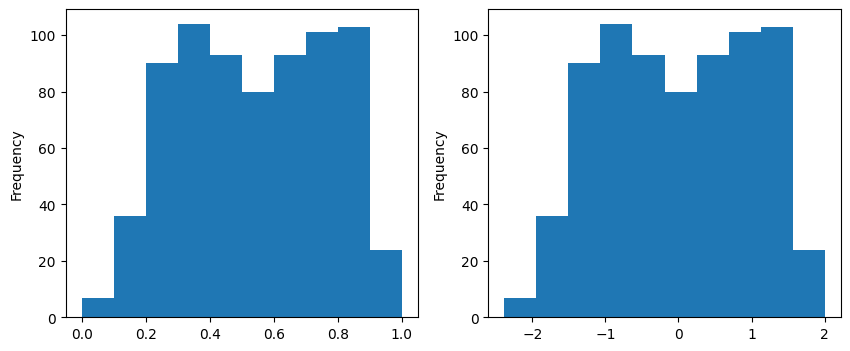

In [32]:
fig,ax = plt.subplots(1,2,figsize=(10,4))
bike_sharing_df['temp'].plot.hist(ax=ax[0])
bike_sharing_df['StandardizedTemp'].plot.hist(ax=ax[1])

In [33]:
# standardizing humidity and windspeed:
bike_sharing_df['StandardizedHumidity'] = (bike_sharing_df['hum'] - 
                                           bike_sharing_df['hum'].mean()) / bike_sharing_df['hum'].std()
bike_sharing_df['StandardizedWindspeed'] = (bike_sharing_df['windspeed'] - 
                                            bike_sharing_df['windspeed'].mean()) / bike_sharing_df['windspeed'].std()

## Log Transformation

In [34]:
bike_sharing_df['LogCasual'] = bike_sharing_df['casual'].apply(lambda x: 0 if x == 0 else np.log(x))

<Axes: ylabel='Frequency'>

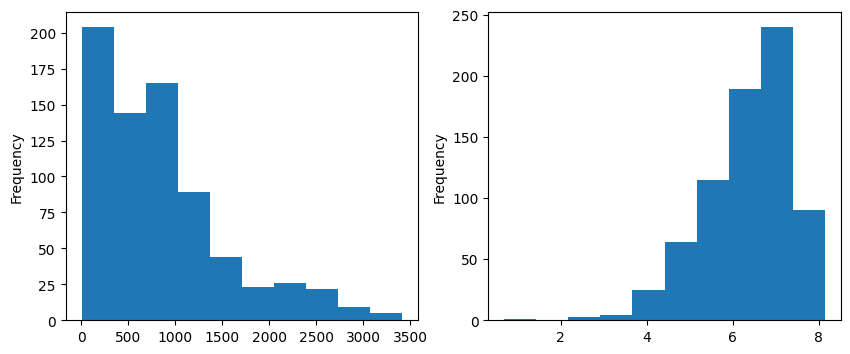

In [35]:
fig,ax = plt.subplots(1,2,figsize=(10,4))
bike_sharing_df['casual'].plot.hist(ax=ax[0])
bike_sharing_df['LogCasual'].plot.hist(ax=ax[1])

## Binning

In [36]:
# (remember that 'temp' is now in a 0-1 range from min to max)

bins = [0, 0.10, 0.20, 0.30, 0.40, 0.50, 0.75, 1.00]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-75', '76-100']

bike_sharing_df['TempCategory'] = pd.cut(bike_sharing_df['temp'], bins=bins, labels=labels)

In [37]:
bike_sharing_df[['temp', 'StandardizedTemp','TempCategory']].head()

,temp,StandardizedTemp,TempCategory
0,0.355170,-0.826097,31-40
1,0.379232,-0.720601,31-40
2,0.171000,-1.633538,11-20
3,0.175530,-1.613675,11-20
4,0.209120,-1.466410,21-30


In [38]:
bike_sharing_df['TempCategory'].value_counts(sort=False)

0-10        6
11-20      36
21-30      90
31-40     104
41-50      93
51-75     228
76-100    173
Name: TempCategory, dtype: int64

## Categorical Encoding (One-Hot Encoding)

In [39]:
bike_sharing_df['season_orig'] = bike_sharing_df['season'] # this keeps the original column, otherwise the values would be dropped
bike_sharing_df = pd.get_dummies(bike_sharing_df, columns=['season'], prefix='Season')

In [40]:
bike_sharing_df.columns

Index(['dteday', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt', 'StandardizedTemp', 'StandardizedHumidity',
       'StandardizedWindspeed', 'LogCasual', 'TempCategory', 'season_orig',
       'Season_1', 'Season_2', 'Season_3', 'Season_4'],
      dtype='object')

In [41]:
bike_sharing_df.sample(10)[['season_orig','Season_1', 'Season_2', 'Season_3', 'Season_4']]

,season_orig,Season_1,Season_2,Season_3,Season_4
126,2,0,1,0,0
146,2,0,1,0,0
90,2,0,1,0,0
431,1,1,0,0,0
185,3,0,0,1,0
486,2,0,1,0,0
695,4,0,0,0,1
396,1,1,0,0,0
573,3,0,0,1,0
40,1,1,0,0,0


In [42]:
bike_sharing_df[['season_orig','Season_1', 'Season_2', 'Season_3', 'Season_4']].sum()

season_orig    1111111111111111111111111111111111111111111111...
Season_1                                                     181
Season_2                                                     184
Season_3                                                     188
Season_4                                                     178
dtype: object

In [43]:
bike_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   dteday                 731 non-null    object  
 1   yr                     731 non-null    int64   
 2   mnth                   731 non-null    int64   
 3   holiday                731 non-null    int64   
 4   weekday                731 non-null    int64   
 5   workingday             731 non-null    int64   
 6   weathersit             731 non-null    object  
 7   temp                   731 non-null    float64 
 8   atemp                  731 non-null    float64 
 9   hum                    731 non-null    float64 
 10  windspeed              731 non-null    float64 
 11  casual                 731 non-null    int64   
 12  registered             731 non-null    int64   
 13  cnt                    731 non-null    int64   
 14  StandardizedTemp       731 non-null    flo

In [44]:
print(bike_sharing_df[['season_orig']].count())
bike_sharing_df[['Season_1', 'Season_2', 'Season_3', 'Season_4']].sum()

season_orig    731
dtype: int64


Season_1    181
Season_2    184
Season_3    188
Season_4    178
dtype: int64

## Missing values / NaNs

In [45]:
import numpy as np

In [46]:
# create some artifical missing values, since there are none here

bike_sharing_df['fakeNaNvals'] = bike_sharing_df['season_orig'].replace('4', np.nan)

In [47]:
bike_sharing_df[['season_orig','fakeNaNvals']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   season_orig  731 non-null    object
 1   fakeNaNvals  553 non-null    object
dtypes: object(2)
memory usage: 11.5+ KB


Options:

* Drop records that have missing values
  * `pd.DataFrame.dropna()`
  * default is to drop rows. This can be explicitly specified with `pd.DataFrame.dropna(axis=0)`
* Drop an entire feature that has lots of missing values
  * `pd.DataFrame.drop(<feature_name>, axis=1)`
  * \<feature_name\> is the name of the column to drop
* Fill in missing values with something else
  * Example: Impute the mean/median (if quantitative) or most common class (if categorical) for all missing values.
  * `pd.DataFrame.fillna(value=x.mean())`

To demonstrate taking care of NaNs, let's create a copy of 5 rows of the dataframe that include NaNs -- this will make it easier to see exactly what each option does.

In [48]:
bike_sharing_df_nan = bike_sharing_df.loc[250:450:50,['season_orig','fakeNaNvals']].copy()
bike_sharing_df_nan

,season_orig,fakeNaNvals
250,3,3
300,4,NaN
350,4,NaN
400,1,1
450,2,2


In [49]:
# Drop records that have missing values
bike_sharing_df_nan.dropna()

,season_orig,fakeNaNvals
250,3,3
400,1,1
450,2,2


In [50]:
# be careful that dropna() by itself will only return a view and not modify the dataset!
bike_sharing_df_nan

,season_orig,fakeNaNvals
250,3,3
300,4,NaN
350,4,NaN
400,1,1
450,2,2


In [51]:
bike_sharing_df_nan = bike_sharing_df.loc[250:450:50,['season_orig','fakeNaNvals']].copy()

# Drop records that have missing values
bike_sharing_df_nan.dropna(inplace=True)

bike_sharing_df_nan

,season_orig,fakeNaNvals
250,3,3
400,1,1
450,2,2


In [52]:
bike_sharing_df_nan = bike_sharing_df.loc[250:450:50,['season_orig','fakeNaNvals']].copy()

# Drop an entire feature that has lots of missing values
bike_sharing_df_nan.drop('fakeNaNvals', axis=1, inplace=True)

bike_sharing_df_nan

,season_orig
250,3
300,4
350,4
400,1
450,2


In [53]:
bike_sharing_df_nan = bike_sharing_df.loc[250:450:50,['season_orig','fakeNaNvals']].copy()

# Fill in missing values with something else
# ERROR #1: beware the datatype!
x = bike_sharing_df_nan['fakeNaNvals']
x.fillna(value=x.mean())

bike_sharing_df_nan

TypeError: can only concatenate str (not "int") to str

In [54]:
bike_sharing_df_nan = bike_sharing_df.loc[250:450:50,['season_orig','fakeNaNvals']].copy()

# Fill in missing values with something else
# ERROR #2: NaNs restrict your operations!
x = bike_sharing_df_nan['fakeNaNvals'].astype(int)
x.fillna(value=x.mean())

bike_sharing_df_nan

ValueError: cannot convert float NaN to integer

In [55]:
bike_sharing_df_nan = bike_sharing_df.loc[250:450:50,['season_orig','fakeNaNvals']].copy()

# Fill in missing values with something else
x = pd.to_numeric(bike_sharing_df_nan['fakeNaNvals'], errors='coerce')
bike_sharing_df_nan['fakeNaNvals'] = x.fillna(value=x.mean())

bike_sharing_df_nan

,season_orig,fakeNaNvals
250,3,3.0
300,4,2.0
350,4,2.0
400,1,1.0
450,2,2.0


## Imputation of Missing Values

In [56]:
# here just for show -> windspeed has no missing values

bike_sharing_df['WindspeedImputed'] = bike_sharing_df['windspeed'].fillna(bike_sharing_df['windspeed'].mean())

## Combining Features in Feature Engineering

In [57]:
bike_sharing_df['HolidayUsage'] = bike_sharing_df['holiday'] * bike_sharing_df['casual']

In [58]:
bike_sharing_df[['casual','HolidayUsage']].describe()

,casual,HolidayUsage
count,731.000000,731.000000
mean,848.176471,30.586867
std,686.622488,227.901881
min,2.000000,0.000000
25%,315.500000,0.000000
50%,713.000000,0.000000
75%,1096.000000,0.000000
max,3410.000000,3065.000000


In [59]:
bike_sharing_df['casual'].sum()

620017

In [60]:
bike_sharing_df['HolidayUsage'].sum() / bike_sharing_df['casual'].sum()

0.036061914431378496

In [61]:
# Interaction Terms

bike_sharing_df['InteractionTerm'] = bike_sharing_df['temp'] * bike_sharing_df['hum']

In [62]:
bike_sharing_df[['temp','hum','InteractionTerm','atemp']].head()

,temp,hum,InteractionTerm,atemp
0,0.355170,0.805833,0.286207,0.373517
1,0.379232,0.696087,0.263978,0.360541
2,0.171000,0.437273,0.074774,0.144830
3,0.175530,0.590435,0.103639,0.174649
4,0.209120,0.436957,0.091377,0.197158


## Discretization

In [63]:
bike_sharing_df['WindSpeedCategory'] = pd.qcut(bike_sharing_df['windspeed'], q=3, labels=['Low', 'Medium', 'High'])

In [64]:
bike_sharing_df[['windspeed','WindSpeedCategory']].sample(15)

,windspeed,WindSpeedCategory
317,0.306596,High
385,0.222642,High
315,0.212062,Medium
381,0.349130,High
5,0.089565,Low
372,0.191542,Medium
314,0.314675,High
638,0.134958,Low
629,0.154229,Medium
724,0.168726,Medium


## Target Encoding

In [65]:
mean_casual_users = bike_sharing_df.groupby('weekday')['casual'].mean()
bike_sharing_df['WeekdayEncoded'] = bike_sharing_df['weekday'].map(mean_casual_users)

In [66]:
bike_sharing_df[['weekday','casual','WeekdayEncoded']].head(15)

,weekday,casual,WeekdayEncoded
0,6,331,1465.257143
1,0,131,1338.295238
2,1,120,674.133333
3,2,108,556.182692
4,3,82,551.144231
5,4,88,590.961538
6,5,148,752.288462
7,6,68,1465.257143
8,0,54,1338.295238
9,1,41,674.133333


# Important: save your transformed data

In [68]:
bike_sharing_df.to_csv('bike_transformed.csv')

There are many data transformations you can do, and many operations you may want to do on your Pandas dataframes.

Here are 15 examples of some common dataframe operations.  I invite you to add to the list!

1. Remove duplicate rows: `df.drop_duplicates()`
2. Drop columns with missing values: `df.dropna(axis=1)`
3. Fill missing values with a specific value: `df.fillna(value)`
4. Replace values in a column: `df['column'].replace(old_value, new_value)`
5. Rename columns: `df.rename(columns={'old_name': 'new_name'})`
6. Sort rows by a column: `df.sort_values(by='column')`
7. Filter rows based on a condition: `df[df['column'] > value]`
8. Group rows by a column and calculate mean: `df.groupby('column').mean()`
9. Apply a function to a column: `df['column'].apply(function)`
10. Create a new column based on existing columns: `df['new_column'] = df['column1'] + df['column2']`
11. Convert a column to datetime format: `df['date_column'] = pd.to_datetime(df['date_column'])`
12. Extract year from a datetime column: `df['year'] = df['date_column'].dt.year`
13. Convert categorical variables to numerical using one-hot encoding: `pd.get_dummies(df['categorical_column'])`
14. Normalize numerical columns: `df['normalized_column'] = (df['column'] - df['column'].mean()) / df['column'].std()`
15. Merge two dataframes based on a common column: `pd.merge(df1, df2, on='common_column')`

These are just a few examples of the many data transformations you can perform on a dataset, and remember that even these examples have functionality that can be expanded with additional input parameters that are not shown.